In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

# Questão 4.1

In [2]:
xls = 'empresa.xls'
url = 'http://www.ime.usp.br/~jmsinger/MorettinSinger/empresa.xls'
df4_1 = pd.read_excel(xls, skiprows=1)
attr = list(df4_1)
print(attr)

['N', 'Estado Civil', 'Grau de Instrução', 'N de Filhos', 'Salario (x Sal Min)', 'Anos', 'Meses', 'Região de Procedência']


In [3]:
df4_1.dtypes

N                          int64
Estado Civil              object
Grau de Instrução         object
N de Filhos              float64
Salario (x Sal Min)      float64
Anos                       int64
Meses                      int64
Região de Procedência     object
dtype: object

In [4]:
df4_1.drop(df4_1[df4_1['Região de Procedência'] == 'outra'].index, inplace=True)

In [5]:
df4_1.describe()

N  N de Filhos  Salario (x Sal Min)       Anos      Meses
count  23.000000    15.000000            23.000000  23.000000  23.000000
mean   18.869565     1.666667            11.504783  34.565217   5.869565
std    11.713645     1.345185             5.259272   6.058998   3.279473
min     1.000000     0.000000             4.000000  25.000000   0.000000
25%     8.500000     1.000000             7.490000  30.500000   4.000000
50%    19.000000     2.000000            10.530000  34.000000   6.000000
75%    29.500000     2.000000            15.350000  38.500000   8.000000
max    36.000000     5.000000            23.300000  48.000000  11.000000

## Distribuição de Frequências

### Estado Civil

In [6]:
estado_civil = pd.crosstab(index=df4_1['Estado Civil'], columns=df4_1['Região de Procedência'], margins=True)
estado_civil

Região de Procedência  capital  interior  All
Estado Civil                                 
casado                       7         8   15
solteiro                     4         4    8
All                         11        12   23

In [7]:
(estado_civil/estado_civil.loc['All']).round(2)

Região de Procedência  capital  interior   All
Estado Civil                                  
casado                    0.64      0.67  0.65
solteiro                  0.36      0.33  0.35
All                       1.00      1.00  1.00

### Grau de Instrução

In [8]:
instrucao = pd.crosstab(index=df4_1['Grau de Instrução'], columns=df4_1['Região de Procedência'], margins=True)
instrucao

Região de Procedência  capital  interior  All
Grau de Instrução                            
ensino fundamental           4         3    7
ensino médio                 5         7   12
superior                     2         2    4
All                         11        12   23

In [9]:
(instrucao/instrucao.loc['All']).round(2)

Região de Procedência  capital  interior   All
Grau de Instrução                             
ensino fundamental        0.36      0.25  0.30
ensino médio              0.45      0.58  0.52
superior                  0.18      0.17  0.17
All                       1.00      1.00  1.00

### Número de Filhos

In [10]:
filhos = pd.crosstab(index=df4_1['N de Filhos'], columns=df4_1['Região de Procedência'], margins=True)
filhos

Região de Procedência  capital  interior  All
N de Filhos                                  
0.0                          0         3    3
1.0                          3         1    4
2.0                          3         2    5
3.0                          1         1    2
5.0                          0         1    1
All                          7         8   15

In [11]:
(filhos/filhos.loc['All']).round(2)

Região de Procedência  capital  interior   All
N de Filhos                                   
0.0                       0.00      0.38  0.20
1.0                       0.43      0.12  0.27
2.0                       0.43      0.25  0.33
3.0                       0.14      0.12  0.13
5.0                       0.00      0.12  0.07
All                       1.00      1.00  1.00

### Salário

In [12]:
salario = pd.crosstab(index=pd.cut(df4_1['Salario (x Sal Min)'], bins=[4, 8, 12, 16, 20, 24], right=False), columns=df4_1['Região de Procedência'])
salario

Região de Procedência  capital  interior
Salario (x Sal Min)                     
[4, 8)                       4         3
[8, 12)                      3         4
[12, 16)                     1         3
[16, 20)                     3         1
[20, 24)                     0         1

### Idade

In [13]:
pd.crosstab(index=pd.cut(df4_1['Anos'], bins=[20, 25, 30, 35, 40, 45, 50], right=False), columns=df4_1['Região de Procedência'])

Região de Procedência  capital  interior
Anos                                    
[25, 30)                     1         4
[30, 35)                     5         3
[35, 40)                     2         2
[40, 45)                     2         3
[45, 50)                     1         0

# Questão 4.3

In [14]:
xls = 'salarios.xls'
url = 'http://www.ime.usp.br/~jmsinger/MorettinSinger/salarios.xls'
df4_3 = pd.read_excel(xls, skiprows=4)
attr = list(df4_3)
print(attr)

['Cidade', 'Prof. Sec.', 'Mecânico', 'Administrador', 'Eng. Eletr.']


# Questão 4.16

In [15]:
xls = 'ex4.16.xlsx'
url = 'https://docs.google.com/spreadsheets/d/1EsVC16bFONERsSGQ2yQxYRwmjat79XaW5hl3bbfG81s/edit?usp=sharing'
df4_16 = pd.read_excel(xls)
attr = list(df4_16)
print(attr)

['Cidade', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [16]:
df4_16

Cidade    1    2    3    4    5    6    7    8    9   10
0      X   59   49   75   65   89   70   54   78   56   60
1      Y  190  180  195  186  200  204  192  215  197  208

In [17]:
transposed = df4_16.set_index('Cidade').transpose()
transposed

Cidade   X    Y
1       59  190
2       49  180
3       75  195
4       65  186
5       89  200
6       70  204
7       54  192
8       78  215
9       56  197
10      60  208

In [18]:
transposed.describe()

Cidade          X           Y
count   10.000000   10.000000
mean    65.500000  196.700000
std     12.411912   10.488618
min     49.000000  180.000000
25%     56.750000  190.500000
50%     62.500000  196.000000
75%     73.750000  203.000000
max     89.000000  215.000000

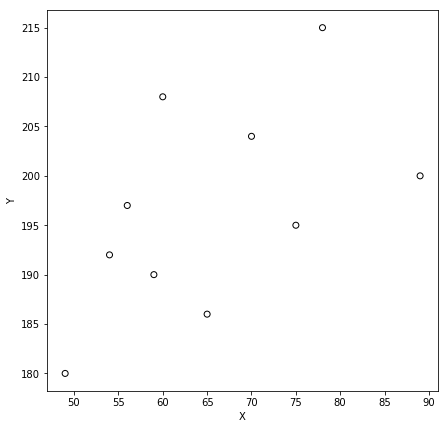

In [19]:
plt.figure(figsize=(7, 7))
plt.scatter(transposed['X'], transposed['Y'], facecolors='none', edgecolors='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Questão 5.4

In [20]:
xls = 'esforco.xls'
url = 'http://www.ime.usp.br/~jmsinger/MorettinSinger/esforco.xls'
df5_4 = pd.read_excel(xls, sheet_name='dados', skiprows=2)
df5_4.replace('.', np.nan, inplace=True)
df5_4.insert(12, 'CARGA Repouso', 0)
df5_4.rename(columns={'ml/kg/min':'VO2 Repouso', 'ml/kg/min.1':'VO2 LAN', 'ml/kg/min.2':'VO2 PCR', 'ml/kg/min.3':'VO2 Pico', 'CARGA':'CARGA LAN', 'CARGA.1':'CARGA PCR', 'CARGA.2':'CARGA Pico', '(bpm)':'FC Repouso', '(bpm).1': 'FC LAN', '(bpm).2':'FC PCR', '(bpm).3':'FC Pico' }, inplace=True)
attr = list(df5_4)
print(attr)

['Ident', 'Iniciais', 'Etiologia', 'Sexo', 'espirométrico', '(anos)', '(cm)', '(kg)', 'corporal', '1o.ERGOESP. (kg/m2)', 'NYHA', 'WEBER', 'CARGA Repouso', 'FC Repouso', 'VO2 Repouso', '(VCO2/VO2)', '(ml/bpm)', 'VE/VO2 ', 'VE/VCO2 ', 'carga minuto (W)', 'MÁXIMO', 'CARGA LAN', '%MAX', 'FC LAN', 'VO2 LAN', '%MAX.1', '(VCO2/VO2).1', '%MAX.2', '(ml/bpm).1', '%MAX.3', 'VE/VO2 .1', '%MAX.4', 'VE/VCO2 .1', '%MAX.5', 'CARGA PCR', '%MAX.6', 'FC PCR', 'VO2 PCR', '%MAX.7', '(VCO2/VO2).2', '%MAX.8', '(ml/bpm).2', '%MAX.9', 'VE/VO2 .2', '%MAX.10', 'VE/VCO2 .2', '%MAX.11', 'CARGA Pico', 'FC Pico', 'VO2 Pico', '(VCO2/VO2).3', '(ml/bpm).3', 'VE/VO2 .3', 'VE/VCO2 .3', 'RAMPA', 'VO2 /   WR', 'VE / VCO2', 'Óbito', 'ptes.não obito.', 'Unnamed: 58']


### Gráficos de Dispersão Simbólicos

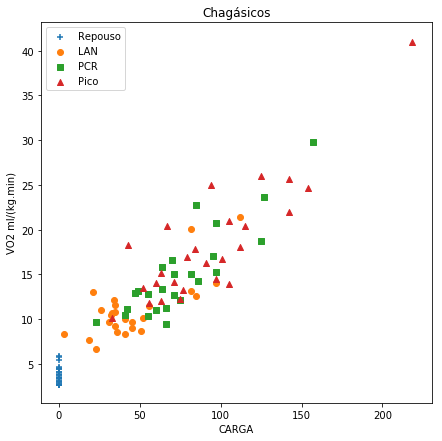

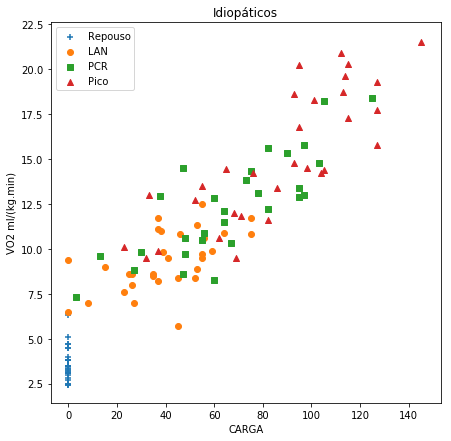

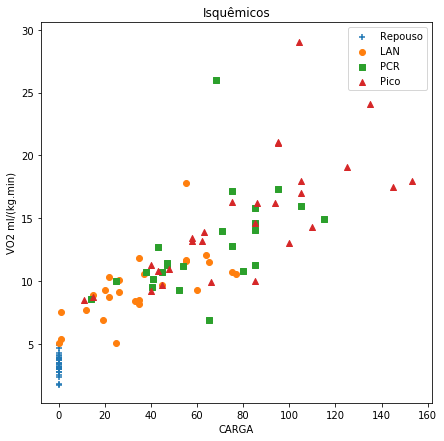

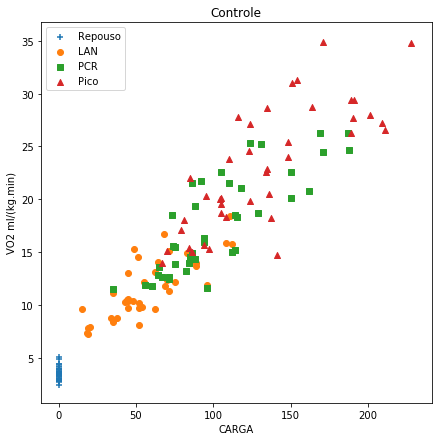

In [21]:
tipos = {'CH':'Chagásicos', 'ID':'Idiopáticos', 'IS':'Isquêmicos', 'C':'Controle'}

for t in tipos.keys():
    df_t = df5_4.loc[df5_4['Etiologia'] == t]
    plt.figure(figsize=(7, 7))
    plt.scatter(x=df_t['CARGA Repouso'], y=df_t['VO2 Repouso'], marker='+', label='Repouso')
    plt.scatter(x=df_t['CARGA LAN'], y=df_t['VO2 LAN'], marker='o', label='LAN')
    plt.scatter(x=df_t['CARGA PCR'], y=df_t['VO2 PCR'], marker='s', label='PCR')
    plt.scatter(x=df_t['CARGA Pico'], y=df_t['VO2 Pico'], marker='^', label='Pico')
    plt.xlabel('CARGA')
    plt.ylabel('VO2 ml/(kg.min)')
    plt.title(tipos[t])
    plt.legend()
    plt.show()

### Coeficiente de Correlação de Pearson

In [22]:
df5_4[['Etiologia', 'VO2 Repouso', 'CARGA LAN', 'VO2 LAN', 'CARGA PCR', 'VO2 PCR', 'CARGA Pico', 'VO2 Pico']].groupby('Etiologia').corr(method='pearson')

VO2 Repouso  CARGA LAN   VO2 LAN  CARGA PCR   VO2 PCR  \
Etiologia                                                                      
C         VO2 Repouso     1.000000   0.303730  0.336148   0.321462  0.496435   
          CARGA LAN       0.303730   1.000000  0.790302   0.887534  0.733132   
          VO2 LAN         0.336148   0.790302  1.000000   0.612894  0.769580   
          CARGA PCR       0.321462   0.887534  0.612894   1.000000  0.819782   
          VO2 PCR         0.496435   0.733132  0.769580   0.819782  1.000000   
          CARGA Pico      0.354943   0.845982  0.597466   0.941965  0.777480   
          VO2 Pico        0.503298   0.653383  0.725188   0.690033  0.887965   
CH        VO2 Repouso     1.000000  -0.330462 -0.027591  -0.353883 -0.217578   
          CARGA LAN      -0.330462   1.000000  0.766108   0.871970  0.811037   
          VO2 LAN        -0.027591   0.766108  1.000000   0.703414  0.849379   
          CARGA PCR      -0.353883   0.871970  0.703414   1.000000  0.861476   
          VO2 PCR        -0.217578   0.811037  0.849379   0.861476  1.000000   
          CARGA Pico     -0.350047   0.831024  0.609581   0.943806  0.738955   
          VO2 Pico       -0.256376   0.829301  0.812282   0.899797  0.935484   
ID        VO2 Repouso     1.000000  -0.241848  0.167746  -0.261721 -0.029898   
          CARGA LAN      -0.241848   1.000000  0.570669   0.893275  0.755664   
          VO2 LAN         0.167746   0.570669  1.000000   0.492057  0.815563   
          CARGA PCR      -0.261721   0.893275  0.492057   1.000000  0.805297   
          VO2 PCR        -0.029898   0.755664  0.815563   0.805297  1.000000   
          CARGA Pico     -0.284315   0.801119  0.451852   0.934062  0.749949   
          VO2 Pico       -0.059417   0.641387  0.723279   0.719475  0.835158   
IS        VO2 Repouso     1.000000  -0.254586  0.232820  -0.266939  0.136175   
          CARGA LAN      -0.254586   1.000000  0.665318   0.745403  0.586505   
          VO2 LAN         0.232820   0.665318  1.000000   0.304941  0.883221   
          CARGA PCR      -0.266939   0.745403  0.304941   1.000000  0.522659   
          VO2 PCR         0.136175   0.586505  0.883221   0.522659  1.000000   
          CARGA Pico      0.070624   0.776779  0.489492   0.945290  0.580680   
          VO2 Pico        0.316531   0.609187  0.829998   0.585238  0.948666   

                       CARGA Pico  VO2 Pico  
Etiologia                                    
C         VO2 Repouso    0.354943  0.503298  
          CARGA LAN      0.845982  0.653383  
          VO2 LAN        0.597466  0.725188  
          CARGA PCR      0.941965  0.690033  
          VO2 PCR        0.777480  0.887965  
          CARGA Pico     1.000000  0.785225  
          VO2 Pico       0.785225  1.000000  
CH        VO2 Repouso   -0.350047 -0.256376  
          CARGA LAN      0.831024  0.829301  
          VO2 LAN        0.609581  0.812282  
          CARGA PCR      0.943806  0.899797  
          VO2 PCR        0.738955  0.935484  
          CARGA Pico     1.000000  0.856635  
          VO2 Pico       0.856635  1.000000  
ID        VO2 Repouso   -0.284315 -0.059417  
          CARGA LAN      0.801119  0.641387  
          VO2 LAN        0.451852  0.723279  
          CARGA PCR      0.934062  0.719475  
          VO2 PCR        0.749949  0.835158  
          CARGA Pico     1.000000  0.815608  
          VO2 Pico       0.815608  1.000000  
IS        VO2 Repouso    0.070624  0.316531  
          CARGA LAN      0.776779  0.609187  
          VO2 LAN        0.489492  0.829998  
          CARGA PCR      0.945290  0.585238  
          VO2 PCR        0.580680  0.948666  
          CARGA Pico     1.000000  0.727058  
          VO2 Pico       0.727058  1.000000

### Coeficiente de Correlação de Spearman

In [23]:
df5_4[['Etiologia', 'VO2 Repouso', 'CARGA LAN', 'VO2 LAN', 'CARGA PCR', 'VO2 PCR', 'CARGA Pico', 'VO2 Pico']].groupby('Etiologia').corr(method='spearman')

VO2 Repouso  CARGA LAN   VO2 LAN  CARGA PCR   VO2 PCR  \
Etiologia                                                                      
C         VO2 Repouso     1.000000   0.264288  0.446542   0.233806  0.508374   
          CARGA LAN       0.264288   1.000000  0.777955   0.879903  0.755190   
          VO2 LAN         0.446542   0.777955  1.000000   0.638258  0.815635   
          CARGA PCR       0.233806   0.879903  0.638258   1.000000  0.817448   
          VO2 PCR         0.508374   0.755190  0.815635   0.817448  1.000000   
          CARGA Pico      0.246472   0.848427  0.614681   0.952030  0.763845   
          VO2 Pico        0.493065   0.686435  0.762691   0.736768  0.875721   
CH        VO2 Repouso     1.000000  -0.292453 -0.060637  -0.459017 -0.275904   
          CARGA LAN      -0.292453   1.000000  0.558068   0.839152  0.558658   
          VO2 LAN        -0.060637   0.558068  1.000000   0.543809  0.761416   
          CARGA PCR      -0.459017   0.839152  0.543809   1.000000  0.781094   
          VO2 PCR        -0.275904   0.558658  0.761416   0.781094  1.000000   
          CARGA Pico     -0.434127   0.854035  0.346963   0.927581  0.553370   
          VO2 Pico       -0.379689   0.710225  0.673166   0.889873  0.869699   
ID        VO2 Repouso     1.000000  -0.106217  0.250507  -0.151040  0.087752   
          CARGA LAN      -0.106217   1.000000  0.592424   0.844549  0.712560   
          VO2 LAN         0.250507   0.592424  1.000000   0.465647  0.808726   
          CARGA PCR      -0.151040   0.844549  0.465647   1.000000  0.779243   
          VO2 PCR         0.087752   0.712560  0.808726   0.779243  1.000000   
          CARGA Pico     -0.184661   0.721588  0.426870   0.934246  0.748922   
          VO2 Pico        0.121461   0.600263  0.710250   0.706571  0.841094   
IS        VO2 Repouso     1.000000  -0.223160  0.058517  -0.347855 -0.138642   
          CARGA LAN      -0.223160   1.000000  0.760784   0.706204  0.693046   
          VO2 LAN         0.058517   0.760784  1.000000   0.391542  0.752438   
          CARGA PCR      -0.347855   0.706204  0.391542   1.000000  0.725252   
          VO2 PCR        -0.138642   0.693046  0.752438   0.725252  1.000000   
          CARGA Pico      0.039962   0.757191  0.534077   0.952881  0.735068   
          VO2 Pico        0.244480   0.668401  0.733578   0.703011  0.927459   

                       CARGA Pico  VO2 Pico  
Etiologia                                    
C         VO2 Repouso    0.246472  0.493065  
          CARGA LAN      0.848427  0.686435  
          VO2 LAN        0.614681  0.762691  
          CARGA PCR      0.952030  0.736768  
          VO2 PCR        0.763845  0.875721  
          CARGA Pico     1.000000  0.788185  
          VO2 Pico       0.788185  1.000000  
CH        VO2 Repouso   -0.434127 -0.379689  
          CARGA LAN      0.854035  0.710225  
          VO2 LAN        0.346963  0.673166  
          CARGA PCR      0.927581  0.889873  
          VO2 PCR        0.553370  0.869699  
          CARGA Pico     1.000000  0.736230  
          VO2 Pico       0.736230  1.000000  
ID        VO2 Repouso   -0.184661  0.121461  
          CARGA LAN      0.721588  0.600263  
          VO2 LAN        0.426870  0.710250  
          CARGA PCR      0.934246  0.706571  
          VO2 PCR        0.748922  0.841094  
          CARGA Pico     1.000000  0.820301  
          VO2 Pico       0.820301  1.000000  
IS        VO2 Repouso    0.039962  0.244480  
          CARGA LAN      0.757191  0.668401  
          VO2 LAN        0.534077  0.733578  
          CARGA PCR      0.952881  0.703011  
          VO2 PCR        0.735068  0.927459  
          CARGA Pico     1.000000  0.823288  
          VO2 Pico       0.823288  1.000000

### Gráfico de Perfil Médio

In [53]:
df5_4['FC_Medio'] = df5_4[['FC Repouso', 'FC LAN', 'FC PCR', 'FC Pico']].mean(axis=1)
perfil = df5_4[['Etiologia', 'NYHA', 'FC_Medio']]
perfil.head()

Etiologia  NYHA    FC_Medio
0        CH     2  107.566645
1        CH     1   97.521277
2        ID     2  118.797297
3        ID     2  112.474414
4        IS     4  102.883450

### Análise Descritiva

In [59]:
perfil.groupby(['Etiologia', 'NYHA']).describe()

FC_Medio                                                 \
                  count        mean        std         min         25%   
Etiologia NYHA                                                           
C         0        40.0  119.168750  12.710331   96.750000  109.625000   
CH        1         9.0  118.462304  14.255200   95.132265  110.855799   
          2         7.0  107.229668  22.719679   66.904545  100.848481   
          3         6.0  113.709864   7.893250  102.263158  109.285887   
          4         4.0  109.616834  14.116177   88.455625  109.352508   
ID        1         1.0  103.066244        NaN  103.066244  103.066244   
          2        10.0  127.634764  14.943752  104.441484  119.326396   
          3        12.0  127.801525  17.238898   93.569069  118.892030   
          4         8.0  126.800962  18.942915   97.847630  118.694559   
IS        1        17.0  107.782484  14.879879   79.052743   98.781879   
          2         6.0  103.477200  18.980162   80.600391   88.209722   
          3         6.0  107.058828  26.967035   82.346939   85.625000   
          4         1.0  102.883450        NaN  102.883450  102.883450   

                                                    
                       50%         75%         max  
Etiologia NYHA                                      
C         0     118.750000  129.187500  144.000000  
CH        1     126.559829  128.243257  133.027240  
          2     107.597826  119.372041  135.664259  
          3     114.126986  120.015269  122.091837  
          4     116.320080  116.584406  117.371550  
ID        1     103.066244  103.066244  103.066244  
          2     125.275755  137.035234  153.660099  
          3     129.710297  138.329270  155.285695  
          4     130.597766  137.959073  148.252632  
IS        1     109.542643  115.498775  129.635924  
          2     103.665046  117.678677  127.524885  
          3     101.546399  120.782023  149.401468  
          4     102.883450  102.883450  102.883450

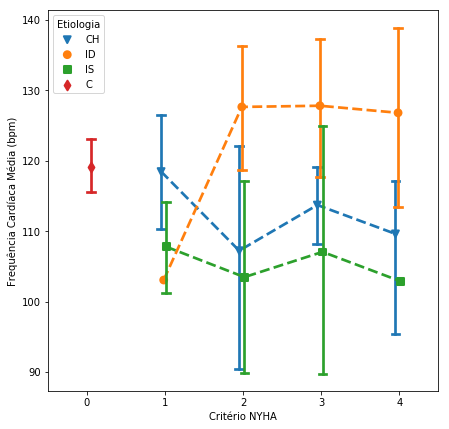

In [54]:
plt.figure(figsize=(7, 7))
sns.pointplot(x='NYHA', y='FC_Medio', hue='Etiologia', data=perfil, markers=['v', 'o', 's', 'd'], linestyles='--', capsize=.1, dodge=True)
plt.xlabel('Critério NYHA')
plt.ylabel('Frequência Cardíaca Média (bpm)')
plt.show()

### ANOVA
<p>Quanto maior o F-test score, mais forte é a correlação
<p>Quanto menor o p-value, mais estatisticamente significante.

In [57]:
model = ols('FC_Medio ~ C(Etiologia)*C(NYHA)', perfil).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               FC_Medio   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     2.641
Date:                Tue, 23 Apr 2019   Prob (F-statistic):            0.00374
Time:                        12:52:19   Log-Likelihood:                -524.41
No. Observations:                 127   AIC:                             1075.
Df Residuals:                     114   BIC:                             1112.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                         119.1687      2.509     47.498      0.000     114.199     124.139
C(Etiologia)[T.CH]                 -3.6687      2.678     -1.370      0.173      -8.973       1.636
C(Etiologia)[T.ID]                  3.5882      3.462      1.036      0.302      -3.270      10.447
C(Etiologia)[T.IS]                 -9.2321      3.552     -2.599      0.011     -16.269      -2.195
C(NYHA)[T.1]                       -4.7207      3.940     -1.198      0.233     -12.525       3.084
C(NYHA)[T.2]                       -2.4630      2.559     -0.963      0.338      -7.532       2.606
C(NYHA)[T.3]                        0.0941      2.575      0.037      0.971      -5.007       5.196
C(NYHA)[T.4]                       -2.2231      4.236     -0.525      0.601     -10.614       6.168
C(Etiologia)[T.CH]:C(NYHA)[T.1]     7.6830      4.961      1.549      0.124      -2.144      17.510
C(Etiologia)[T.ID]:C(NYHA)[T.1]   -14.9701      9.867     -1.517      0.132     -34.516       4.576
C(Etiologia)[T.IS]:C(NYHA)[T.1]     2.5665      4.865      0.527      0.599      -7.072      12.205
C(Etiologia)[T.CH]:C(NYHA)[T.2]    -5.8073      4.530     -1.282      0.202     -14.782       3.167
C(Etiologia)[T.ID]:C(NYHA)[T.2]     7.3408      4.468      1.643      0.103      -1.510      16.192
C(Etiologia)[T.IS]:C(NYHA)[T.2]    -3.9965      5.057     -0.790      0.431     -14.015       6.022
C(Etiologia)[T.CH]:C(NYHA)[T.3]    -1.8843      4.739     -0.398      0.692     -11.272       7.504
C(Etiologia)[T.ID]:C(NYHA)[T.3]     4.9504      4.326      1.144      0.255      -3.619      13.520
C(Etiologia)[T.IS]:C(NYHA)[T.3]    -2.9720      5.063     -0.587      0.558     -13.003       7.059
C(Etiologia)[T.CH]:C(NYHA)[T.4]    -3.6601      6.108     -0.599      0.550     -15.760       8.440
C(Etiologia)[T.ID]:C(NYHA)[T.4]     6.2671      5.503      1.139      0.257      -4.635      17.169
C(Etiologia)[T.IS]:C(NYHA)[T.4]    -4.8301      9.975     -0.484      0.629     -24.591      14.930
==============================================================================
Omnibus:                        0.927   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                1.040
Skew:                          -0.178   Prob(JB):                        0.595
Kurtosis:                       2.735   Cond. No.                     3.96e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.12e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Tabela ANOVA

In [58]:
res = sm.stats.anova_lm(model, typ= 2)
res

sum_sq     df             F    PR(>F)
C(Etiologia)          8.508520e-10    3.0  1.126437e-12  1.000000
C(NYHA)              -3.691034e-11    4.0 -3.664902e-14  1.000000
C(Etiologia):C(NYHA)  7.979489e+03   12.0  2.640998e+00  0.003739
Residual              2.870322e+04  114.0           NaN       NaN

# Questão 5.5

In [27]:
xls = 'arvores.xls'
url = 'http://www.ime.usp.br/~jmsinger/MorettinSinger/arvores.xls'
df5_5 = pd.read_excel(xls)
attr = list(df5_5)
print(attr)

['especie', 'Mn', 'Fe', 'Cu', 'Zn', 'Rb', 'Sr', 'Ba', 'Na', 'Mg', 'Al', 'P', 'S', 'Cl', 'K', 'Ca', 'tipovia']


In [28]:
df5_5.head()

especie     Mn       Fe    Cu      Zn     Rb      Sr      Ba     Na  \
0  Sibipiruna  34.33   517.36  4.23   33.77   5.56   82.40  158.52  26.53   
1  Sibipiruna  41.06  2151.42  6.22  192.80  19.16  109.79  842.10  20.95   
2  Sibipiruna  48.63  1215.05  7.12  295.84  12.20  198.50  756.37  26.44   
3   Alfeneiro  39.83  1183.79  5.60  100.67   6.49   49.10  544.96  20.96   
4     Tipuana  23.19   695.74  6.67  154.11  16.97  171.65  700.49  13.87   

       Mg       Al       P       S      Cl       K       Ca    tipovia  
0   537.0   405.84  1100.0  2470.0   47.95  1163.0  36737.0  Collector  
1  1563.0  1563.01   843.0  3210.0   88.14  1055.0  29335.0  Collector  
2  1124.0   935.44  1086.0  3632.0  153.47  1882.0  37991.0  Collector  
3  1450.0   661.81   700.0  2483.0   55.69  1145.0  15043.0   Local II  
4  2898.0   616.29   773.0  6058.0  718.40  1748.0  39113.0  Collector

In [29]:
arvores = df5_5[['especie', 'Mn', 'Fe', 'Cu', 'Zn', 'Sr', 'Ba', 'Mg', 'Al', 'P', 'S', 'Cl', 'Ca', 'tipovia']]
arvores.head()

especie     Mn       Fe    Cu      Zn      Sr      Ba      Mg       Al  \
0  Sibipiruna  34.33   517.36  4.23   33.77   82.40  158.52   537.0   405.84   
1  Sibipiruna  41.06  2151.42  6.22  192.80  109.79  842.10  1563.0  1563.01   
2  Sibipiruna  48.63  1215.05  7.12  295.84  198.50  756.37  1124.0   935.44   
3   Alfeneiro  39.83  1183.79  5.60  100.67   49.10  544.96  1450.0   661.81   
4     Tipuana  23.19   695.74  6.67  154.11  171.65  700.49  2898.0   616.29   

        P       S      Cl       Ca    tipovia  
0  1100.0  2470.0   47.95  36737.0  Collector  
1   843.0  3210.0   88.14  29335.0  Collector  
2  1086.0  3632.0  153.47  37991.0  Collector  
3   700.0  2483.0   55.69  15043.0   Local II  
4   773.0  6058.0  718.40  39113.0  Collector

### Vetores de Média

In [30]:
arvores.groupby(['especie', 'tipovia']).mean().transpose()

especie     Alfeneiro                                              Sibipiruna  \
tipovia      Arterial     Collector       Local I      Local II      Arterial   
Mn          73.082500     86.532333     82.743158     62.550000     52.696230   
Fe        2675.476316   3015.749333   2794.203684   2041.775714   1722.119839   
Cu          10.522105      8.243548      8.514211      6.647143      7.068548   
Zn         244.193158    234.796452    256.251579    184.404286    112.257258   
Sr          80.742000     81.313871    102.695789     81.060000    112.223387   
Ba        1677.780000   1449.005161   1465.621579    872.670000    926.221774   
Mg        1550.450000   1847.000000   1557.368421   1774.285714    902.661290   
Al        2029.435000   2153.321000   2161.948421   1377.341429   1386.899032   
P         1015.450000   1095.709677   1135.210526    988.571429   1066.096774   
S         3591.400000   4147.903226   3564.947368   2646.142857   3242.629032   
Cl         105.002500    149.707419    120.387895    160.961429     76.949677   
Ca       19808.250000  18138.483871  18680.473684  17040.428571  32877.032258   

especie                                                 Tipuana                \
tipovia     Collector       Local I      Local II      Arterial     Collector   
Mn          60.322075     57.592533     71.236316     63.957193     46.449231   
Fe        2027.957736   1613.766267   1570.747368   2274.506949   1547.212115   
Cu           7.062453      7.032133      6.016579      8.412542      7.432692   
Zn         118.442264     91.932667     66.291316    199.427966    139.687500   
Sr         102.246981    117.231333     91.284474    157.364407    176.912692   
Ba         931.633962    767.266164    626.048947    973.859661    552.416538   
Mg         760.169811   1063.320000   1051.210526   2062.559322   2396.211538   
Al        2173.029057   1234.398800   1082.644737   1346.365593   1006.780577   
P         1084.132075   1188.760000   1133.052632    902.482759    996.057692   
S         3836.962264   3539.640000   3555.815789   4014.438596   4326.941176   
Cl          93.245849    120.429333    103.227632    204.543898    317.668431   
Ca       27969.773585  27292.256757  27265.947368  32601.288136  35672.576923   

especie                              
tipovia       Local I      Local II  
Mn          52.667917     48.992941  
Fe        1064.899583    696.889706  
Cu           5.940000      5.233824  
Zn         100.556250     59.130000  
Sr         131.996250    128.515294  
Ba         472.375625    288.820294  
Mg        2017.937500   2432.969697  
Al         758.482708    518.000000  
P          911.479167    850.911765  
S         3486.166667   3024.787879  
Cl         142.956875    141.212647  
Ca       31129.958333  33153.878788

### Matriz de Covariâncias

#### Espécie Alfeneiro

In [31]:
arvores.loc[arvores['especie'] == 'Alfeneiro'].groupby('tipovia').cov()

Mn            Fe            Cu             Zn  \
tipovia                                                                  
Arterial  Mn    1104.692936  3.855879e+04     96.934185    2123.511464   
          Fe   38558.790588  3.385744e+06   6500.501084   69343.227694   
          Cu      96.934185  6.500501e+03     43.246506     499.948865   
          Zn    2123.511464  6.934323e+04    499.948865   10492.470189   
          Sr     162.761753  1.263477e+04     15.523744     352.256689   
          Ba   26113.158563  1.235775e+06   1876.290652   50511.557617   
          Mg    -792.470132 -2.393060e+05    121.131988   16964.994094   
          Al   29662.487429  3.416501e+06   6357.620770   47748.687666   
          P     1998.308289  4.542343e+04    145.900965    6612.841170   
          S    15725.971579  4.762039e+05   1453.595058   44743.906199   
          Cl     588.856414 -3.749920e+03     13.510753    2025.341762   
          Ca -138338.145921 -5.521907e+06 -15961.685439 -397142.455936   
Collector Mn    1873.079439  7.492726e+04     63.811494    2619.418952   
          Fe   74927.262660  4.246497e+06   3754.154621  146824.163724   
          Cu      63.811494  3.754155e+03      5.808890     145.817626   
          Zn    2619.418952  1.468242e+05    145.817626   10545.243437   
          Sr     230.040650  2.038453e+04     17.621149    1120.195704   
          Ba   31879.136491  1.869755e+06   1754.301288   67234.468012   
          Mg    -213.128586  1.377074e+04    329.755000    8534.182667   
          Al   64070.355673  3.290814e+06   2800.610382  113821.083889   
          P      456.356632  7.542653e+03    -77.081269    5497.406602   
          S    32502.655954  2.100111e+06   3253.963355   76704.700978   
          Cl    -798.506775 -3.597285e+04     10.044859    -531.220746   
          Ca -192281.898483 -8.275778e+06  -7000.964774 -255139.719226   
Local I   Mn    2652.502756  1.179357e+05    121.608664    6079.093639   
          Fe  117935.748471  6.469453e+06   5586.847645  269785.941727   
          Cu     121.608664  5.586848e+03      9.136570     286.965676   
          Zn    6079.093639  2.697859e+05    286.965676   20278.357958   
          Sr    1623.810108  7.357311e+04     99.115696    4413.803818   
          Ba   70713.780911  4.515097e+06   3485.580899  148087.289770   
          Mg    6736.553216  3.647421e+05     72.578363    7581.773830   
          Al   91890.899377  5.104272e+06   4282.360713  251001.701008   
          P     5521.872076  2.121116e+05    378.825175   14955.349094   
          S    43427.933509  1.896742e+06   3146.168567  111104.045643   
          Cl     425.713274  3.995602e+04     61.816648    2423.438337   
          Ca -135458.941579 -6.800959e+06  -7164.209883 -121924.805234   
Local II  Mn    1351.447000  3.933248e+04      5.563700    2417.066267   
          Fe   39332.477600  1.258552e+06    333.988102   72349.376388   
          Cu       5.563700  3.339881e+02      0.928857      66.262048   
          Zn    2417.066267  7.234938e+04     66.262048    9286.206829   
          Sr     716.750867  2.383347e+04      6.514667     940.467400   
          Ba   26839.082317  7.710716e+05    182.710483   57521.683917   
          Mg    2517.933333  1.387316e+05     82.414286   -5888.804762   
          Al   41822.610717  1.253464e+06    379.779055   91430.502776   
          P     1428.416667  3.807601e+04    214.895238   22978.023810   
          S    -1673.943333 -8.322841e+04    216.678810   20350.470952   
          Cl   -1545.154100 -3.056244e+03     78.166121   -1669.922857   
          Ca    2243.040000 -5.423306e+05    630.759762  171427.982857   

                        Sr            Ba            Mg            Al  \
tipovia                                                                
Arterial  Mn    162.761753  2.611316e+04 -7.924701e+02  2.966249e+04   
          Fe  12634.766488  1.235775e+06 -2.393060e+05  3.416501e+06   
          Cu     15.523744  1.876291

#### Espécie Sibipiruna

In [32]:
arvores.loc[arvores['especie'] == 'Sibipiruna'].groupby('tipovia').cov()

Mn            Fe            Cu             Zn  \
tipovia                                                                  
Arterial  Mn    1341.381564  5.443792e+04     59.066633    1937.313131   
          Fe   54437.923640  2.914672e+06   2575.006616  101253.155486   
          Cu      59.066633  2.575007e+03      9.080452     153.756522   
          Zn    1937.313131  1.012532e+05    153.756522    7180.750991   
          Sr      75.499113 -3.088255e+03     -4.236126     698.578819   
          Ba   31575.535284  1.433766e+06   1450.384645   59946.395425   
          Mg    9506.040096  3.752862e+05    478.577369   20052.500040   
          Al   47317.145667  2.372286e+06   2060.766300   77095.707320   
          P      966.057112  5.549157e+04    122.997848    3847.519614   
          S    29781.922855  1.510342e+06   1682.444535   54377.247163   
          Cl     539.139776  2.661025e+04     67.477321    1408.224815   
          Ca -224734.311809 -1.183610e+07 -11195.687002 -382839.942861   
Collector Mn    1492.182859  4.418919e+04     42.652478    1764.304720   
          Fe   44189.193091  2.594101e+06   1891.357608   61046.431305   
          Cu      42.652478  1.891358e+03      4.937380     160.039344   
          Zn    1764.304720  6.104643e+04    160.039344   12636.242237   
          Sr     247.762864  4.380800e+03     36.159796    1998.100544   
          Ba   17705.198926  1.662435e+06    464.696673   18513.835089   
          Mg    3542.466564  1.872328e+05     45.888999    6586.811724   
          Al  129295.242767  4.867878e+06    434.758918   32611.407714   
          P     3042.309336  4.079435e+04     89.076785    8337.838541   
          S    36386.227195  1.068381e+06   1799.434325   52870.312779   
          Cl     191.866782  1.199820e+04     62.414035    1682.359192   
          Ca -166254.061829 -8.821089e+06  -4240.312896   55750.623022   
Local I   Mn     507.965422  1.479454e+04     29.643350     544.115707   
          Fe   14794.540939  1.063842e+06   2727.678653   41817.144079   
          Cu      29.643350  2.727679e+03     33.375068     261.822343   
          Zn     544.115707  4.181714e+04    261.822343    4617.199506   
          Sr     875.540493  1.830750e+04     22.156661      -5.466290   
          Ba    4689.166483  4.104450e+05    768.799066   10567.980991   
          Mg     476.831746  4.924705e+04    130.798768    9570.628595   
          Al   11543.987296  7.390889e+05   1464.080667   24462.258169   
          P     5362.200481  1.140173e+05     -3.161508   -1387.303541   
          S     8966.831870  4.619056e+05   2231.891724   20438.278270   
          Cl    1346.247177  2.768445e+04     15.339841     276.765823   
          Ca  -44529.036836 -2.419788e+06  -3972.979013  -98229.692112   
Local II  Mn    7436.825240  1.826361e+03      1.656903     430.785135   
          Fe    1826.361479  1.482002e+06   1214.368769   41568.044050   
          Cu       1.656903  1.214369e+03      1.600288      39.105021   
          Zn     430.785135  4.156804e+04     39.105021    1842.033558   
          Sr    -914.619216  1.788207e+02     12.100075     261.953099   
          Ba    1624.289783  4.998663e+05    467.184623   14115.871034   
          Mg   -6975.437852 -9.972892e+04     71.999388     213.836743   
          Al   -2103.232539  9.695581e+05    601.683695   22685.363175   
          P    -2890.449801  9.174477e+04    126.519374    1978.223442   
          S    11293.345789  4.996856e+05    735.783137   15986.864303   
          Cl     739.396523 -5.984959e+03     -4.057746     -27.851121   
          Ca -284345.471280 -3.029225e+06  -1577.635320  -92833.423713   

                         Sr            Ba            Mg            Al  \
tipovia                                                                 
Arterial  Mn      75.499113  3.157554e+04  9.506040e+03  4.731715e+04   
          Fe   -3088.255440  1.433766e+06  3.752862e+05  2.372286e+06   
          Cu      -4.236126  1.4

#### Espécie Tipuana

In [33]:
arvores.loc[arvores['especie'] == 'Tipuana'].groupby('tipovia').cov()

Mn            Fe           Cu             Zn  \
tipovia                                                                
Arterial  Mn    669.802796  2.049014e+04     6.940736     692.400349   
          Fe  20490.142719  1.719897e+06  1584.542056   78042.877613   
          Cu      6.940736  1.584542e+03     6.298409     196.924690   
          Zn    692.400349  7.804288e+04   196.924690   12290.619148   
          Sr    202.871368  2.206058e+04    44.390495    2496.429494   
          Ba   7114.293408  6.443514e+05   590.387116   29371.882644   
          Mg   3863.870802 -2.090406e+05  -629.103860  -16320.025739   
          Al  11824.955594  1.037069e+06   795.733372   34470.115305   
          P     208.885497 -2.550599e+04   -32.665802     -63.153285   
          S    9833.551178  1.075827e+06  1379.457278   77358.767055   
          Cl    199.506896  3.675382e+04    -5.481269    1702.917841   
          Ca -64083.951585 -3.172648e+06   814.873738   16883.713872   
Collector Mn    645.515623  2.205565e+04    23.260986    1338.344996   
          Fe  22055.654880  1.414614e+06  1830.690488   65398.068439   
          Cu     23.260986  1.830690e+03     5.159667     150.277328   
          Zn   1338.344996  6.539807e+04   150.277328    8229.463596   
          Sr     33.003320 -7.908786e+03    10.898297    1355.627413   
          Ba   7308.151460  4.909364e+05   559.577598   19340.287836   
          Mg  -1982.455324 -7.741600e+04  -177.355679  -27105.298873   
          Al  14346.268149  9.474188e+05  1163.794445   42414.426384   
          P    1959.766516  5.584613e+04    42.318665    6117.925637   
          S    4829.425176  4.303018e+05  1352.405729   41186.228376   
          Cl      0.035917 -9.713442e+03   121.357204    2807.451810   
          Ca -68522.824057 -4.611793e+06 -4343.857466  -14810.963039   
Local I   Mn   1302.595983  1.188928e+04     6.074219     652.826922   
          Fe  11889.275405  7.169272e+05   981.984962   45088.082303   
          Cu      6.074219  9.819850e+02     2.222736      75.854955   
          Zn    652.826922  4.508808e+04    75.854955    5391.225015   
          Sr      7.078071  1.095894e+03     4.937398      54.771524   
          Ba   6028.148399  3.662132e+05   603.938464   25386.451279   
          Mg  -1829.354388 -1.447999e+05  -203.623617   -9568.943005   
          Al   8899.860323  5.245774e+05   758.309247   31623.477502   
          P     685.506764  7.195228e+04   175.899362    5588.959707   
          S    9505.211418  3.834775e+05   980.208511   32363.456596   
          Cl   -640.830566  1.876124e+03    11.356083    -410.988393   
          Ca -39449.742429 -2.578466e+06 -2555.819149 -208660.445266   
Local II  Mn   2081.392112  1.023669e+04    11.227349     304.737527   
          Fe  10236.685840  3.507867e+05   564.319222   18941.753585   
          Cu     11.227349  5.643192e+02     1.927533      53.541570   
          Zn    304.737527  1.894175e+04    53.541570    1770.857042   
          Sr    360.896775  1.309034e+04    47.199816    1418.333073   
          Ba   2572.296196  1.125148e+05   188.182384    6211.865282   
          Mg  10241.276487 -6.794835e+04    36.195672   -5164.686761   
          Al   4294.635394  1.901261e+05   362.649988   11108.778461   
          P    2291.965116  7.104464e+04   215.419135    5754.002424   
          S    3345.948220  3.685129e+05  1058.142831   30579.804858   
          Cl   -307.422102  3.364401e+04   128.990450    3525.427979   
          Ca -73981.171866 -7.412268e+05  2220.905502   17470.365142   

                         Sr            Ba            Mg            Al  \
tipovia                                                                 
Arterial  Mn     202.871368  7.114293e+03  3.863871e+03  1.182496e+04   
          Fe   22060.584783  6.443514e+05 -2.090406e+05  1.037069e+06   
          Cu      44.390495  5.903871e+02 -6.291039e+02  7.957334e+02   
          Zn    2496.429494  2.937188e+04 -1.632003e+04  3

### Matriz de Correlações

#### Espécie Alfeneiro

In [34]:
arvores.loc[arvores['especie'] == 'Alfeneiro'].groupby('tipovia').corr()

Mn        Fe        Cu        Zn        Sr        Ba  \
tipovia                                                                    
Arterial  Mn  1.000000  0.638327  0.451099  0.634433  0.208482  0.481515   
          Fe  0.638327  1.000000  0.523340  0.359160  0.286883  0.404780   
          Cu  0.451099  0.523340  1.000000  0.742183  0.097969  0.170387   
          Zn  0.634433  0.359160  0.742183  1.000000  0.142721  0.294485   
          Sr  0.208482  0.286883  0.097969  0.142721  1.000000  0.329447   
          Ba  0.481515  0.404780  0.170387  0.294485  0.329447  1.000000   
          Mg -0.037989 -0.203244  0.028643  0.257542 -0.084533  0.088253   
          Al  0.444273  0.906468  0.468589  0.225941  0.196641  0.396567   
          P   0.312295  0.125758  0.115411  0.335825  0.216650  0.133213   
          S   0.446232  0.252878  0.207181  0.409428 -0.032094  0.054642   
          Cl  0.356822 -0.040008  0.040388  0.388696 -0.182953  0.166699   
          Ca -0.586692 -0.433244 -0.333173 -0.532199  0.426029 -0.323528   
Collector Mn  1.000000  0.840130  0.610097  0.612716  0.233235  0.720963   
          Fe  0.840130  1.000000  0.753833  0.721298  0.434063  0.888084   
          Cu  0.610097  0.753833  1.000000  0.589163  0.325172  0.690991   
          Zn  0.612716  0.721298  0.589163  1.000000  0.485166  0.621553   
          Sr  0.233235  0.434063  0.325172  0.485166  1.000000  0.196288   
          Ba  0.720963  0.888084  0.690991  0.621553  0.196288  1.000000   
          Mg -0.008564  0.011622  0.241386  0.146623 -0.178645 -0.020150   
          Al  0.814063  0.878146  0.637250  0.633628  0.370185  0.843346   
          P   0.046197  0.016036 -0.140826  0.235728  0.456196 -0.105435   
          S   0.461889  0.626792  0.842376  0.466051  0.512965  0.436230   
          Cl -0.217522 -0.205808  0.049246 -0.061126 -0.122006 -0.260393   
          Ca -0.588928 -0.532347 -0.382225 -0.326932  0.405855 -0.629602   
Local I   Mn  1.000000  0.900293  0.781169  0.828885  0.463064  0.684638   
          Fe  0.900293  1.000000  0.726677  0.744851  0.424834  0.885153   
          Cu  0.781169  0.726677  1.000000  0.666687  0.481598  0.575001   
          Zn  0.828885  0.744851  0.666687  1.000000  0.455229  0.518545   
          Sr  0.463064  0.424834  0.481598  0.455229  1.000000  0.197881   
          Ba  0.684638  0.885153  0.575001  0.518545  0.197881  1.000000   
          Mg  0.195523  0.214358  0.035893  0.079587 -0.075545  0.182205   
          Al  0.750749  0.844403  0.596131  0.741669  0.492442  0.621858   
          P   0.393924  0.306397  0.460470  0.385864  0.745712  0.152828   
          S   0.608621  0.538245  0.751270  0.563143  0.674370  0.373914   
          Cl  0.133875  0.254425  0.331227  0.275631  0.317319  0.103696   
          Ca -0.408096 -0.414876 -0.367755 -0.132849  0.220736 -0.445304   
Local II  Mn  1.000000  0.953710  0.157033  0.682291  0.741743  0.973628   
          Fe  0.953710  1.000000  0.308902  0.669237  0.808233  0.916609   
          Cu  0.157033  0.308902  1.000000  0.713463  0.257159  0.252821   
          Zn  0.682291  0.669237  0.713463  1.000000  0.371287  0.796045   
          Sr  0.741743  0.808233  0.257159  0.371287  1.000000  0.610790   
          Ba  0.973628  0.916609  0.252821  0.796045  0.610790  1.000000   
          Mg  0.148374  0.267888  0.185243 -0.132380  0.670444  0.000072   
          Al  0.972912  0.955516  0.336991  0.811398  0.671923  0.990115   
          P   0.122558  0.107054  0.703296  0.752107 -0.181832  0.281297   
          S  -0.114628 -0.186761  0.565968  0.531625 -0.197462  0.036485   
          Cl -0.285364 -0.018496  0.550645 -0.117653  0.259219 -0.342714   
          Ca  0.015092 -0.119574  0.161881  0.440018 -0.461726  0.149687   

                    Mg        Al         P         S        Cl        Ca  
tipovia                                                                   
Arterial  Mn -0.037989  0.444273  0.312295  0.446232  0.356822 -0.586

#### Espécie Sibipiruna

In [35]:
arvores.loc[arvores['especie'] == 'Sibipiruna'].groupby('tipovia').corr()

Mn        Fe        Cu        Zn        Sr        Ba  \
tipovia                                                                    
Arterial  Mn  1.000000  0.914834  0.533693  0.663655  0.042024  0.789434   
          Fe  0.914834  1.000000  0.500530  0.699888 -0.036847  0.764430   
          Cu  0.533693  0.500530  1.000000  0.602136 -0.028635  0.438111   
          Zn  0.663655  0.699888  0.602136  1.000000  0.167926  0.643921   
          Sr  0.042024 -0.036847 -0.028635  0.167926  1.000000  0.070440   
          Ba  0.789434  0.764430  0.438111  0.643921  0.070440  1.000000   
          Mg  0.449476  0.381489  0.275621  0.410675  0.047706  0.354193   
          Al  0.794565  0.857352  0.421951  0.561348 -0.007304  0.775346   
          P   0.152942  0.187304  0.235212  0.261644  0.222688  0.112164   
          S   0.717722  0.763930  0.482126  0.554122  0.090350  0.585327   
          Cl  0.282513  0.299969  0.430949  0.319822 -0.067571  0.140883   
          Ca -0.599154 -0.655689 -0.351383 -0.427284  0.466432 -0.461000   
Collector Mn  1.000000  0.710251  0.496918  0.406306  0.163661  0.337957   
          Fe  0.710251  1.000000  0.528484  0.337177  0.069403  0.761067   
          Cu  0.496918  0.528484  1.000000  0.640722  0.415239  0.154203   
          Zn  0.406306  0.337177  0.640722  1.000000  0.453554  0.121439   
          Sr  0.163661  0.069403  0.415239  0.453554  1.000000 -0.058678   
          Ba  0.337957  0.761067  0.154203  0.121439 -0.058678  1.000000   
          Mg  0.221206  0.280408  0.049815  0.141341  0.022787  0.202422   
          Al  0.585639  0.528816  0.034234  0.050760  0.037070  0.498975   
          P   0.332805  0.107030  0.169400  0.313431  0.244600 -0.001087   
          S   0.694245  0.488899  0.596863  0.346649  0.221548  0.069476   
          Cl  0.054077  0.081105  0.305815  0.162943  0.126630 -0.013261   
          Ca -0.461219 -0.586914 -0.204501  0.053148  0.533108 -0.371932   
Local I   Mn  1.000000  0.636423  0.227666  0.355292  0.243949  0.233438   
          Fe  0.636423  1.000000  0.457766  0.596660  0.111463  0.456913   
          Cu  0.227666  0.457766  1.000000  0.666970  0.024084  0.149607   
          Zn  0.355292  0.596660  0.666970  1.000000 -0.000505  0.192998   
          Sr  0.243949  0.111463  0.024084 -0.000505  1.000000 -0.016081   
          Ba  0.233438  0.456913  0.149607  0.192998 -0.016081  1.000000   
          Mg  0.022851  0.051570  0.024454  0.152127  0.199641 -0.115853   
          Al  0.585687  0.819379  0.289788  0.411656  0.041536  0.487844   
          P   0.389628  0.181032 -0.000896 -0.033435  0.883419 -0.030825   
          S   0.346246  0.389742  0.336221  0.261769 -0.318845  0.230041   
          Cl  0.227528  0.102241  0.010114  0.015515  0.934107 -0.120364   
          Ca -0.272308 -0.317080 -0.092496 -0.194542  0.542086 -0.054274   
Local II  Mn  1.000000  0.017397  0.015188  0.116391 -0.292753  0.036642   
          Fe  0.017397  1.000000  0.788546  0.795585  0.004055  0.798798   
          Cu  0.015188  0.788546  1.000000  0.720252  0.264025  0.718450   
          Zn  0.116391  0.795585  0.720252  1.000000  0.168473  0.639832   
          Sr -0.292753  0.004055  0.264025  0.168473  1.000000  0.045980   
          Ba  0.036642  0.798798  0.718450  0.639832  0.045980  1.000000   
          Mg -0.073089 -0.074024  0.051428  0.004502  0.513751 -0.245828   
          Al -0.024897  0.813037  0.485546  0.539583 -0.113549  0.752274   
          P  -0.128091  0.288007  0.382212  0.176146  0.143538  0.237054   
          S   0.137826  0.431991  0.612144  0.392028  0.140194  0.449550   
          Cl  0.095422 -0.054715 -0.035699 -0.007222  0.054839 -0.205442   
          Ca -0.473015 -0.356968 -0.178908 -0.310297  0.554055 -0.294687   

                    Mg        Al         P         S        Cl        Ca  
tipovia                                                                   
Arterial  Mn  0.449476  0.794565  0.152942  0.717722  0.282513 -0.599

#### Espécie Tipuana

In [36]:
arvores.loc[arvores['especie'] == 'Tipuana'].groupby('tipovia').corr()

Mn        Fe        Cu        Zn        Sr        Ba  \
tipovia                                                                    
Arterial  Mn  1.000000  0.618367  0.105569  0.240651  0.114570  0.452744   
          Fe  0.618367  1.000000  0.481434  0.536779  0.249407  0.796834   
          Cu  0.105569  0.481434  1.000000  0.707779  0.262251  0.381521   
          Zn  0.240651  0.536779  0.707779  1.000000  0.333868  0.429676   
          Sr  0.114570  0.249407  0.262251  0.333868  1.000000  0.185788   
          Ba  0.452744  0.796834  0.381521  0.429676  0.185788  1.000000   
          Mg  0.170409 -0.182450 -0.286926 -0.168499 -0.145338 -0.167367   
          Al  0.530091  0.907136  0.363721  0.356675  0.204451  0.793247   
          P   0.063025 -0.147418 -0.098308 -0.004370  0.219114 -0.181362   
          S   0.255651  0.559062  0.392615  0.477310  0.253705  0.395561   
          Cl  0.037854  0.138956 -0.010829  0.076161  0.189724  0.254831   
          Ca -0.271451 -0.261631  0.035115  0.016470  0.705481 -0.207026   
Collector Mn  1.000000  0.729874  0.403055  0.580669  0.014761  0.605843   
          Fe  0.729874  1.000000  0.677618  0.606122 -0.075561  0.869385   
          Cu  0.403055  0.677618  1.000000  0.729284  0.054520  0.518866   
          Zn  0.580669  0.606122  0.729284  1.000000  0.169809  0.449038   
          Sr  0.014761 -0.075561  0.054520  0.169809  1.000000 -0.074193   
          Ba  0.605843  0.869385  0.518866  0.449038 -0.074193  1.000000   
          Mg -0.081651 -0.068112 -0.081704 -0.312664 -0.137410 -0.085636   
          Al  0.645662  0.910841  0.585848  0.534622 -0.080508  0.845950   
          P   0.386361  0.235189  0.093318  0.337801  0.359202  0.104423   
          S   0.112498  0.214647  0.422572  0.290396  0.470135  0.101827   
          Cl  0.000004 -0.023803  0.154587  0.089550  0.290066 -0.037038   
          Ca -0.259067 -0.372461 -0.183694 -0.015683  0.715360 -0.372652   
Local I   Mn  1.000000  0.389057  0.112886  0.246348  0.003433  0.299324   
          Fe  0.389057  1.000000  0.777899  0.725238  0.022659  0.775101   
          Cu  0.112886  0.777899  1.000000  0.692941  0.057979  0.725957   
          Zn  0.246348  0.725238  0.692941  1.000000  0.013059  0.619613   
          Sr  0.003433  0.022659  0.057979  0.013059  1.000000 -0.075904   
          Ba  0.299324  0.775101  0.725957  0.619613 -0.075904  1.000000   
          Mg -0.057940 -0.195486 -0.156124 -0.148972  0.464375 -0.078731   
          Al  0.363558  0.913414  0.749891  0.634982 -0.022263  0.884689   
          P   0.088080  0.394075  0.547132  0.352987  0.173501  0.328109   
          S   0.137599  0.236625  0.343505  0.230287  0.511160  0.158674   
          Cl -0.168812  0.021066  0.072419 -0.053217  0.438899 -0.057213   
          Ca -0.118245 -0.329434 -0.185452 -0.307427  0.388632 -0.272765   
Local II  Mn  1.000000  0.378844  0.177255  0.158729  0.129920  0.273570   
          Fe  0.378844  1.000000  0.686282  0.759988  0.362993  0.921748   
          Cu  0.177255  0.686282  1.000000  0.916428  0.558352  0.657661   
          Zn  0.158729  0.759988  0.916428  1.000000  0.553547  0.716233   
          Sr  0.129920  0.362993  0.558352  0.553547  1.000000  0.315958   
          Ba  0.273570  0.921748  0.657661  0.716233  0.315958  1.000000   
          Mg  0.309831 -0.159282  0.037023 -0.170592 -0.025577 -0.226014   
          Al  0.257200  0.877086  0.713689  0.721268  0.429828  0.808045   
          P   0.235420  0.562110  0.727101  0.640752  0.678677  0.487889   
          S   0.076353  0.651598  0.816387  0.761883  0.600197  0.574054   
          Cl -0.049026  0.413292  0.675970  0.609524  0.433802  0.360617   
          Ca -0.222125 -0.172443  0.225450  0.057270  0.532353 -0.139972   

                    Mg        Al         P         S        Cl        Ca  
tipovia                                                                   
Arterial  Mn  0.170409  0.530091  0.063025  0.255651  0.037854 -0.271